# 作業目標:

    使用CIFAR100, 數據集變大的影響
    
    
# 作業重點:¶

   了解 CIFAR100 跟 CIFAR10 數據及差異


In [1]:
import numpy
from keras.datasets import cifar100
from keras.datasets import cifar10
import numpy as np
np.random.seed(100)

Using TensorFlow backend.


# 資料準備

In [4]:
(x100_img_train,y100_label_train),(x100_img_test,y100_label_test)=cifar100.load_data(label_mode='fine')
(x10_img_train,y10_label_train),(x10_img_test,y10_label_test)=cifar10.load_data()

In [5]:
print("train_100:",len(x100_img_train),"test_100:",len(x100_img_test),",",x100_img_train.shape)
print("train_10:",len(x10_img_train),"test_10:",len(x10_img_test),",",x10_img_train.shape)

train_100: 50000 test_100: 10000 , (50000, 32, 32, 3)
train_10: 50000 test_10: 10000 , (50000, 32, 32, 3)


In [6]:
print(y100_label_test)

[[49]
 [33]
 [72]
 ...
 [51]
 [42]
 [70]]


In [ ]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [7]:
#導入影像列印模組
import matplotlib.pyplot as plt

#宣告一個影像標記的函數
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=100):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)#+','+label_dict[labels[i][0]]
#        if len(prediction)>0:
#            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

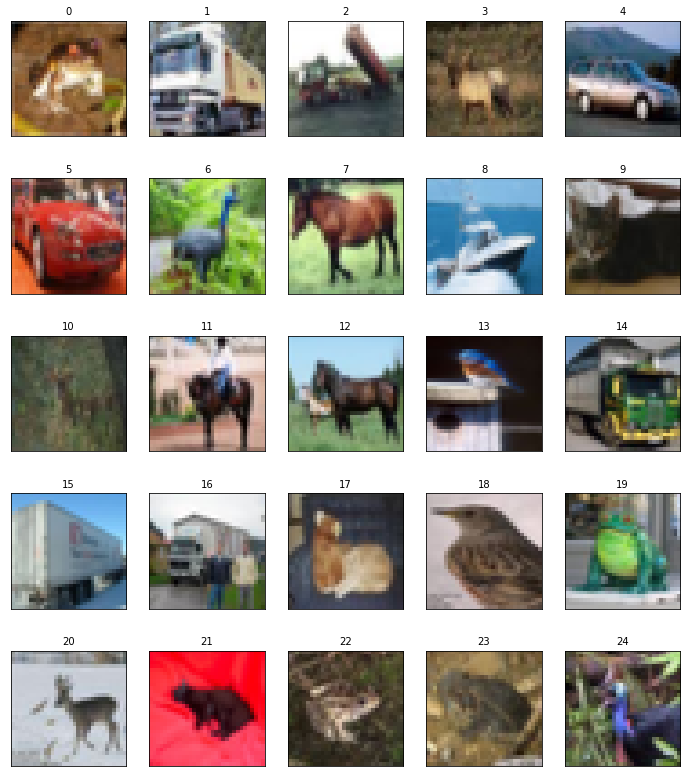

In [15]:
plot_images_labels_prediction(x10_img_train,y10_label_train,[],0)

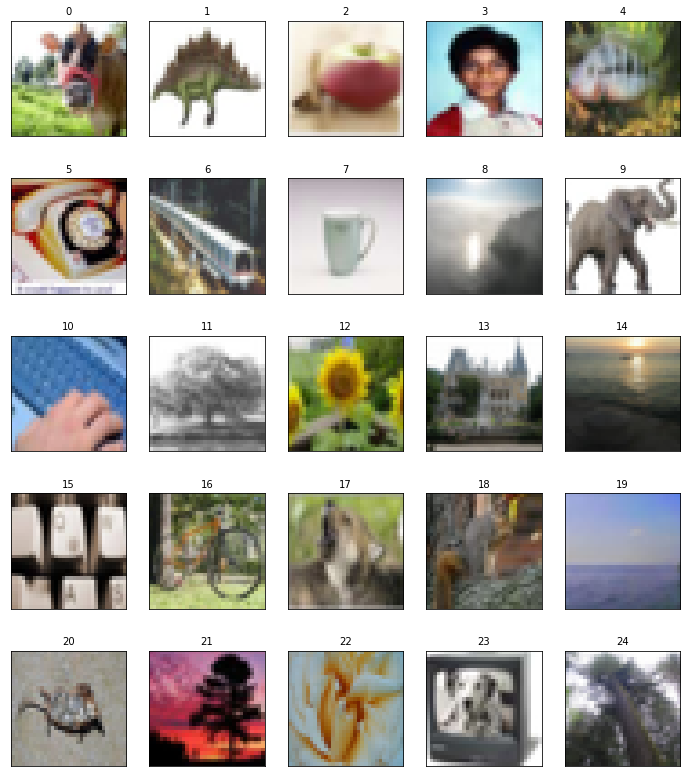

In [8]:
plot_images_labels_prediction(x100_img_train,y100_label_train,[],0)

# Image normalize 

In [9]:
x100_img_train_normalize = x100_img_train.astype('float32') / 255.0
x10_img_train_normalize = x10_img_train.astype('float32') / 255.0
x100_img_test_normalize = x100_img_test.astype('float32') / 255.0
x10_img_test_normalize = x10_img_test.astype('float32') / 255.0

In [10]:
print(x100_img_train_normalize[0][0][0])
print(x10_img_train_normalize[0][0][0])

[1. 1. 1.]
[0.23137255 0.24313726 0.24705882]


# 轉換label 為OneHot Encoding

In [11]:
from keras.utils import np_utils
y100_label_train_OneHot = np_utils.to_categorical(y100_label_train)
y10_label_train_OneHot = np_utils.to_categorical(y10_label_train)
y100_label_test_OneHot = np_utils.to_categorical(y100_label_test)
y10_label_test_OneHot = np_utils.to_categorical(y10_label_test)

In [14]:
print(y100_label_train_OneHot.shape)
print(y10_label_train_OneHot.shape)

(50000, 100)
(50000, 10)


In [12]:
y100_label_train_OneHot[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.

In [13]:
y10_label_train_OneHot[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)